<a href="https://colab.research.google.com/github/hongsamhc2/growdevlo.github.io/blob/master/mnist3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download dataset = sklearn.datasets

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [ ]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [ ]:
#show img
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

some_digit = X[0]

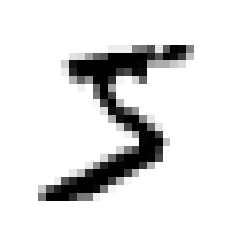

In [ ]:
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
y = y.astype(np.uint8)

In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [ ]:
X_train,X_test,y_train,y_test = X[:6000],X[6000:],y[:6000],y[6000:]

In [ ]:
#binary classifier 5

y_train_5=(y_train==5)
y_test_5 = (y_test==5)

In [ ]:
#stochastic gradient descent

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
#cross valid

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in skfolds.split(X_train,y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.962
0.956
0.9665


In [ ]:
#cross_val_score

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')


array([0.962 , 0.956 , 0.9665])

In [ ]:
#make dummy not 5

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self,X,y=None):
    return self
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91 , 0.915, 0.918])

In [ ]:
#confusion matrix

from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[5375,  111],
       [ 120,  394]])

In [ ]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[5486,    0],
       [   0,  514]])

In [ ]:
#precision / recall

from sklearn.metrics import precision_score,recall_score

In [ ]:
precision_score(y_train_5,y_train_pred)

0.7801980198019802

In [ ]:
recall_score(y_train_5,y_train_pred)

0.7665369649805448

In [ ]:
#f1score

from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7733071638861628

In [ ]:
#decision_ function

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([38042.34312442])

In [ ]:
threshold =0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                             method='decision_function')


In [ ]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

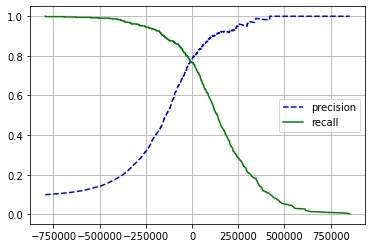

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
  plt.plot(thresholds,precisions[:-1],'b--',label='precision')
  plt.plot(thresholds,recalls[:-1],'g-',label='recall')
  plt.grid()
  plt.legend()

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
precision_score

<function sklearn.metrics._classification.precision_score>

In [ ]:
recall_score(y_train_5,y_train_pred_90)

0.5680933852140078

In [ ]:
#roc
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

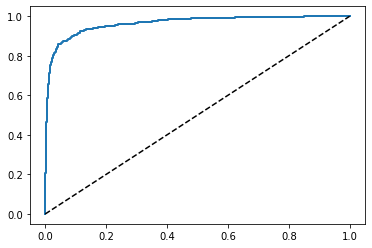

In [ ]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
#auc = 곡선아래의 면적 = area_under_the curve

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9641599203348885

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train_5,cv=3,method='predict_proba')

In [ ]:
y_scores_forest=y_probas_forest[:,1]

In [ ]:
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

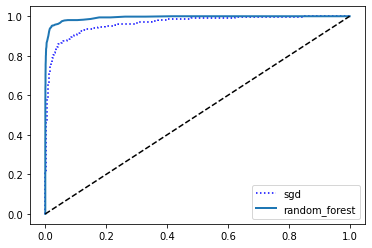

In [ ]:
plt.plot(fpr,tpr,'b:',label='sgd')
plot_roc_curve(fpr_forest,tpr_forest,'random_forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#다중분류기

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
some_digit_scores =svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.74201669,  3.75934047,  6.18134457,  8.29644372, -0.30252035,
         9.30527336,  1.74930094,  2.77838477,  7.19221016,  3.87315474]])

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([some_digit])


array([5], dtype=uint8)

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
sgd_clf.decision_function([some_digit])

array([[-735711.69660953, -857058.38635209, -281086.00104909,
           8289.73273042, -616793.26669143,   29040.2961313 ,
        -492305.02284074, -834395.17091855, -318385.3774766 ,
        -363474.38706356]])

In [ ]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.8565, 0.8715, 0.8635])

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.8705, 0.8985, 0.8925])

In [ ]:
#error analysis

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[572,   0,   1,   2,   1,   9,   3,   1,   3,   0],
       [  0, 637,   6,   3,   1,   5,   0,   1,  16,   2],
       [ 10,  12, 493,  11,  10,   4,  10,   9,  20,   2],
       [  3,   5,  21, 514,   1,  35,   1,   7,  11,  10],
       [  3,   2,   7,   0, 556,   2,  10,   8,   9,  26],
       [  5,   6,   5,  24,  14, 411,  10,   1,  25,  13],
       [  4,   4,   6,   0,   5,   6, 577,   1,   5,   0],
       [  3,   4,   7,   2,   9,   0,   1, 577,   3,  45],
       [  2,  19,  13,  16,   4,  10,   6,   3, 464,  14],
       [  7,   4,   5,   7,  15,   3,   0,  27,  11, 522]])

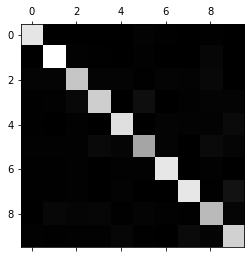

In [ ]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

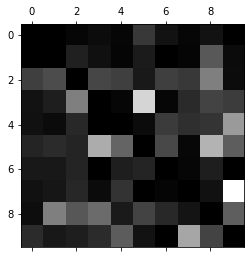

In [ ]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
#다중 레이블 분류
from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train>=7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average='macro')

0.9500922726736858

In [ ]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train+noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train_mod
y_test_mod = X_test